### 1. Initialize tracer
First, import the library and initialize the Tracer with your 3D space boundaries and voxel resolution.

In [15]:
from gpu_voxel_tracer import Tracer

# bounds: Execution area (xmin, xmax, ymin, ymax, zmin, zmax)
# voxel_size: Resolution of cubic voxels
tracer = Tracer(bounds=(0, 100, 0, 100, 0, 100), voxel_size=0.5)

Initialized Tracer Grid: (200, 200, 200)


### 2. Execute ray-tracing  
`starts` and `ends` should be NumPy arrays of shape `(N, 3)`. In this tutorial, `10000` rays originate from a single point at the bottom center `(50, 50, 0)` and spread upward toward a randomized target area at the top, forming a cone shape centered at `(50, 50, 100)`.


In [16]:
import numpy as np

# Create dummy data for demonstration
# starts: Start coordinates of rays (N, 3)
# ends:   End coordinates of rays (N, 3)

n_rays = 10000 # total number of simulating rays
starts = np.zeros((n_rays, 3)) + [50, 50, 0]
ends = np.random.normal(loc=[50, 50, 100], scale=[15, 15, 0], size=(n_rays, 3))

results = tracer.run(starts, ends)

### 3. Access result


In [17]:
beams = results["beam_counts"]
points = results["point_counts"]
lengths = results["path_lengths"]

### 4. Visualize result

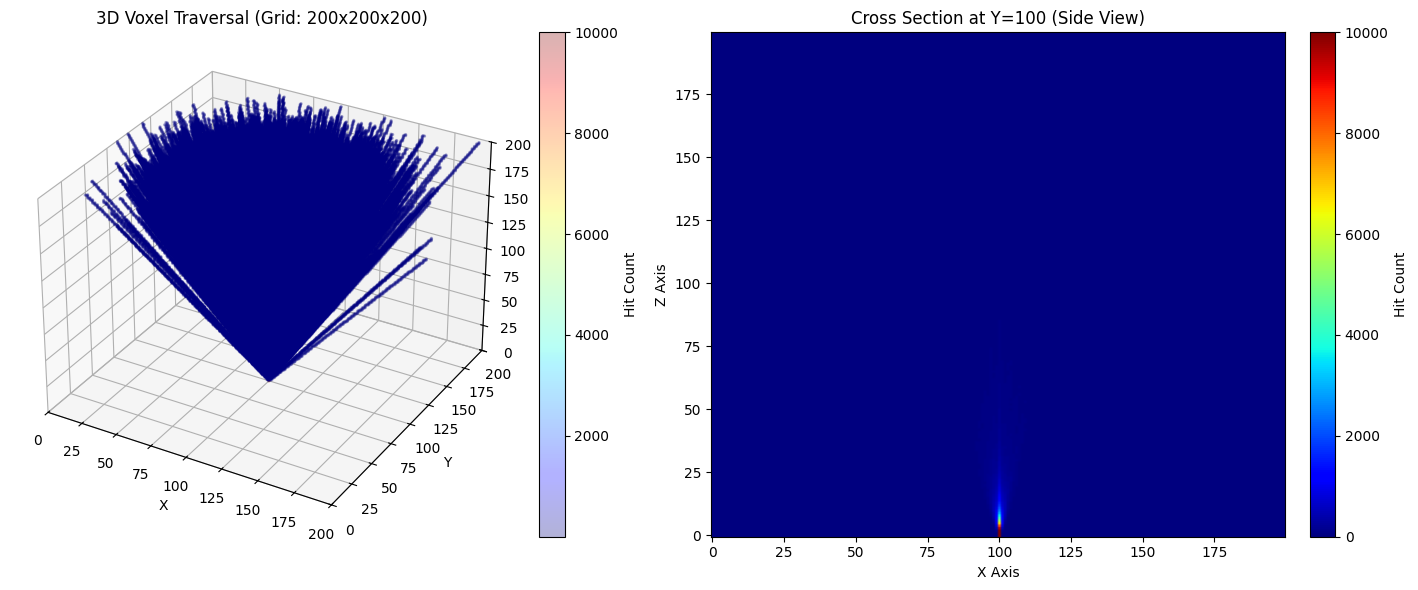

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Use the result from your previous run
grid = beams  

# Get dimensions dynamically (instead of hardcoding 100)
nx, ny, nz = grid.shape

# Setup Figure
fig = plt.figure(figsize=(15, 6))

# ==========================================
# 1. Left Plot: 3D Visualization
# ==========================================
ax_3d = fig.add_subplot(1, 2, 1, projection='3d')
ax_3d.set_title(f"3D Voxel Traversal (Grid: {nx}x{ny}x{nz})")

# Filter: Only plot voxels that were hit
# (Optimization: You can use 'grid > 5' here to filter noise if it's too heavy)
x, y, z = np.where(grid > 0)
hits = grid[x, y, z]

# Plot Scatter
scatter = ax_3d.scatter(x, y, z, c=hits, cmap='jet', s=2, alpha=0.3)

# Set axes limits dynamically based on data shape
ax_3d.set_xlim(0, nx)
ax_3d.set_ylim(0, ny)
ax_3d.set_zlim(0, nz)
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('Z')

# Add Colorbar
plt.colorbar(scatter, ax=ax_3d, label='Hit Count', fraction=0.046, pad=0.04)


# ==========================================
# 2. Right Plot: 2D Cross-Section (Side View)
# ==========================================
ax_slice = fig.add_subplot(1, 2, 2)

# Automatically find the center index for the Y-axis
mid_y = ny // 2
ax_slice.set_title(f"Cross Section at Y={mid_y} (Side View)")

# Slice the 3D array at the middle of Y
# .T (Transpose) swaps axes so X is horizontal and Z is vertical
slice_data = grid[:, mid_y, :].T

# Plot Heatmap
# aspect='auto' ensures the pixels aren't distorted if dimensions aren't square
heatmap = ax_slice.imshow(slice_data, cmap='jet', origin='lower', aspect='auto')

ax_slice.set_xlabel('X Axis')
ax_slice.set_ylabel('Z Axis')

# Add Colorbar
plt.colorbar(heatmap, ax=ax_slice, label='Hit Count', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()